# Carga de los datos

Primero realizamos los imports correspondientes de las librerias que son necesarias:

In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Ahora cargamos los datos de los dos datasets recopilados en un dataframe para facilitar su manejo, el primer dataset está dividido en noticias clasificadas como verdaderas y noticias clasificadas como falsas. En el caso del segundo dataset vienen divididos en conjunto de prueba y conjunto de test, además el conjunto de test no cuenta con las labels correspondientes pues estas se encuentran en un archivo diferente.

In [3]:
#DataSet #1
df_fake = pd.read_csv("News_dataset/Fake.csv")
df_true = pd.read_csv("News_dataset/True.csv")

#DataSet #2
train_df = pd.read_csv("fake-news/train.csv")
test_df = pd.read_csv("fake-news/test.csv")
test_labels = pd.read_csv("fake-news/submit.csv")

A continuación podremos encontrar una breve información de cada uno de los dataframes anteriores:

In [4]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [8]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5200 non-null   int64
 1   label   5200 non-null   int64
dtypes: int64(2)
memory usage: 81.4 KB


# Exploratory analysis and data preparation

## Dataframe union

Como se comentó anteriormente, el primer dataset se encuentra separado entre noticias falsas y verdaderas, por lo tanto, se unirán ambos dataframes para crear un unico dataframe, con esto buscamos unificar la información para el modelo.

In [9]:
df_fake['target'] = 'Fake'
df_true['target'] = 'True'

df_news = pd.concat([df_fake, df_true])

In [10]:
df_news = df_news.reset_index(drop=True)

El dataframe "df_news" será ahora nuestro nuevo dataset conformado por la concatenación de los dos anteriores.

In [11]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


Ahora tenemos una vista previa de como están conformados nuestros datasets, podemos observar que cuentan con información adicional además del texto del articulo en sí mismo, esta información aunque relevante, no se va a tener en cuenta en este proyecto, puesto que se usará un enfoque principalmente dirigido al analisis del lenguaje natural que se encuentra en el texto de cada articulo.

In [12]:
df_news.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [13]:
df_news.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True


Como se puede observar a continuación, el segundo dataset difiere del primero puesto que este no contiene la información adicional que contenia el anterior, en este caso no será necesaria su depuración. La depuración del primer dataset se hará en la siguiente fase.

In [14]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \r\nAn Iranian woman has been sentenced ...,1


In [15]:
train_df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


### Union test_df y test_labels

En el segundo dataset el test no cuenta con las labels, recordemos que estas se encuentran en otro dataframe, por lo tanto es necesario unir ambos datasets.

In [16]:
test_df["label"] = test_labels["label"]

In [17]:
test_df.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [18]:
test_df.tail()

,id,title,author,text,label
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,0


## Depuración de los dataset

Anteriormente se mencionó que algunos de los atributos que se encuentran en el primer dataset no son relevantes en este caso, por lo tanto se procederá con la eliminación de las columnas correspondientes.

In [19]:
df_news = df_news.drop(columns=['subject','date'])

In [20]:
df_news.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake


Ahora para el segundo dataset se depuraran las columnas que no sean necesarias para mantener la estructura anterior.

In [21]:
train_df = train_df.drop(columns=['id','author'])
test_df = test_df.drop(columns=['id','author'])

In [22]:
train_df.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \r\nAn Iranian woman has been sentenced ...,1


In [23]:
test_df.head()

,title,text,label
0,"Specter of Trump Loosens Tongues, if Not Purse...","PALO ALTO, Calif. — After years of scorning...",0
1,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...,1
2,#NoDAPL: Native American Leaders Vow to Stay A...,Videos #NoDAPL: Native American Leaders Vow to...,0
3,"Tim Tebow Will Attempt Another Comeback, This ...","If at first you don’t succeed, try a different...",1
4,Keiser Report: Meme Wars (E995),42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


Ahora los dataset ya tienen una estructura muy similar, cuentas con las mismas columnas, y los datos son consistentes, pero se puede observar que la columan objetivo difiere entre datasets, esto se modificará más adelante

## Check for missing data

En esta etapa se verificará los valores faltantes,y se tomará la decisión de depurar los datos, imputarlos, o reemplazarlos por algún valor.

In [24]:
df_news.isnull().sum()

title     0
text      0
target    0
dtype: int64

In [25]:
train_df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [26]:
test_df.isnull().sum()

title    122
text       7
label      0
dtype: int64

Como se puede ver la cantidad de valores faltantes en los datasets es despreciable en comparación con el tamaño total de los mismos, por lo tanto se tomó la decision que para "text" que es nuestro principal predictor, se depuraran los valores que hacen falta en el mismo. Para el caso de title que tiene una cantidad un poco más alta se decidió reemplazar por el valor 'Unknown'.

In train_ds_filled, it was found that there are missing data in title, text, and author fields. Since we are assessing the veracity of the news, it's crucial to consider these fields. Therefore, instead of removing them, we have decided to replace the missing values with the string "Unknown".

In [27]:
#Train_DF
train_df['title'].fillna('Unknown', inplace=True)
train_df = train_df.dropna(subset=['text'])
train_df = train_df.reset_index(drop=True)
#Test_DF
test_df['title'].fillna('Unknown', inplace=True)
test_df = test_df.dropna(subset=['text'])
test_df = test_df.reset_index(drop=True)

In [28]:
train_df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [29]:
test_df.isnull().sum()

title    0
text     0
label    0
dtype: int64

# Merging dataframes train_df and df_news, with label conversion


Para la construcción del modelo, se hará uso de la combinación del primer dataset con el conjunto de entrenamiento del segundo dataset, el conjunto de  prueba será usado para validar el rendimiento del modelo. A continuación se hará la combinación de ambos conjuntos de datos. 


In this scenario, the data in the 'target' variable of df_news was converted to numerical values, where 1 represents fake news and 0 represents real news. This conversion enabled the merging with train_ds_filled.

In [30]:
df_news.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake


In [31]:
df_news['target'] = df_news['target'].map({'Fake': 1, 'True':0})

In [32]:
df_news.head()

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [33]:
train_df.rename(columns={'label': 'target'}, inplace=True)
train_df.head()

,title,text,target
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \r\nAn Iranian woman has been sentenced ...,1


In [34]:
# Concatenar los DataFrames
df_combined = pd.concat([train_df[['title', 'text', 'target']], df_news[['title', 'text', 'target']]])

# Resetear los índices
df_combined.reset_index(drop=True, inplace=True)

# Unir el título al inicio del texto con un salto de línea
df_combined['text'] = df_combined.apply(lambda row: f"{row['title']}\n{row['text']}", axis=1)

# Eliminar la columna 'title' si no es necesaria
df_combined.drop(columns=['title'], inplace=True)

# Mostrar las primeras filas del DataFrame combinado
df_combined.head()

,text,target
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired\nWhy the Tru...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [35]:
print(df_combined.iloc[0]['text'])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intel

In [36]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65659 entries, 0 to 65658
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    65659 non-null  object
 1   target  65659 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [37]:
df_combined.isnull().sum()

text      0
target    0
dtype: int64

## Distribution of news according to their category

 This graph illustrates the distribution of fake and true news in the dataset.
  
- The "Fake" bar represents the number of news classified as fake, reaching just over 20,000 on the Y-axis.
- The "True" bar represents the number of news classified as true. It is slightly shorter than the "Fake" bar but still close to 20,000.

## df_combined distribution

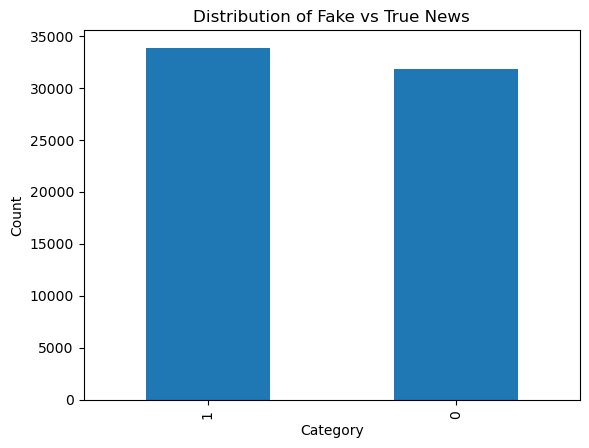

In [38]:
distribution = df_combined['target'].value_counts()

distribution.plot(kind='bar')
plt.title('Distribution of Fake vs True News')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



In this context, the "label" indicates the reliability of the news:

1: Indicates that the news is unreliable.

0: Indicates that the news is reliable.

This graph shows how fake and true news are distributed in the dataset.


- The "Fake" bar represents the number of news articles classified as fake, reaching just over 10,000 on the Y-axis.
- The "True" bar represents the number of news articles classified as true. It is slightly shorter than the "Fake" bar, but still close to 10,000.

## test_df distribution

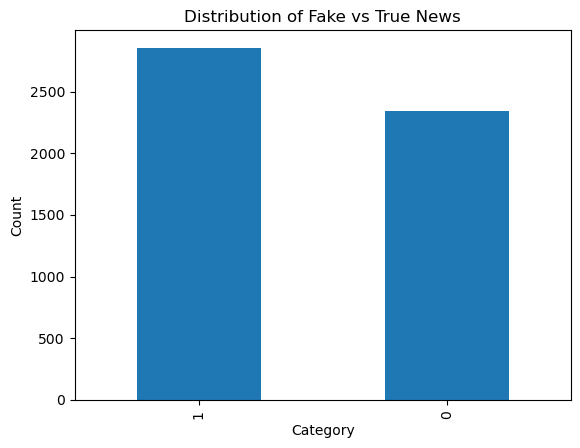

In [39]:
distribution = test_df['label'].value_counts()

distribution.plot(kind='bar')
plt.title('Distribution of Fake vs True News')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Distribution of Fake and True News According to Text Length

The following plots depict the distribution of text length for fake and true news news.


## df_combined

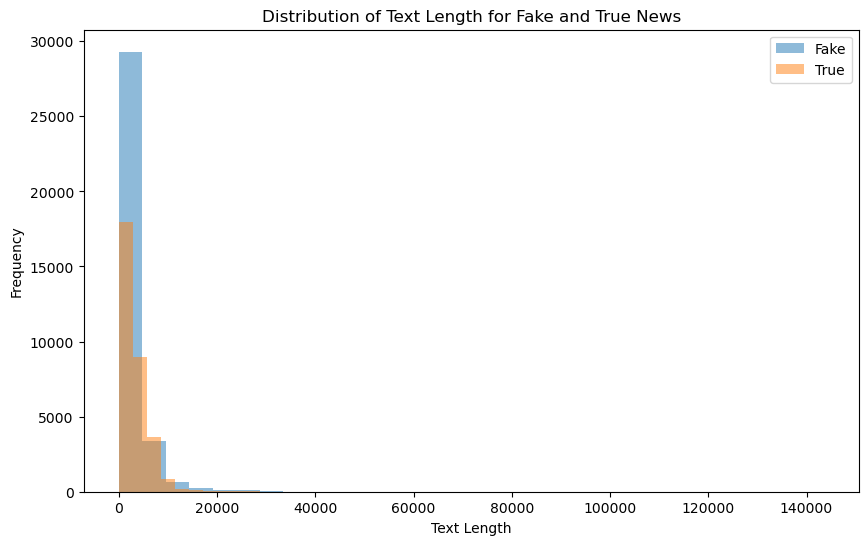

In [40]:
df_combined['text_length'] = df_combined['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df_combined[df_combined['target'] == 1]['text_length'], alpha=0.5, label='Fake', bins=30)
plt.hist(df_combined[df_combined['target'] == 0]['text_length'], alpha=0.5, label='True', bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Fake and True News')
plt.legend()
plt.show()


## test_df

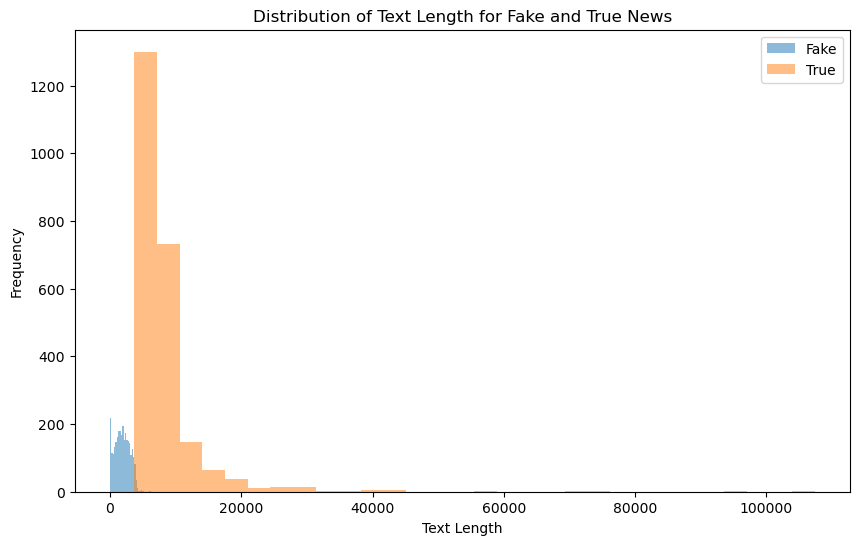

In [41]:
test_df['text_length'] = test_df['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(test_df[test_df['label'] == 1]['text_length'], alpha=0.5, label='Fake', bins=30)
plt.hist(test_df[test_df['label'] == 0]['text_length'], alpha=0.5, label='True', bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Fake and True News')
plt.legend()
plt.show()

## Distribution of Fake and True News According to Title Length

The following plots depict the distribution of title length for fake and true news news.

## test_df

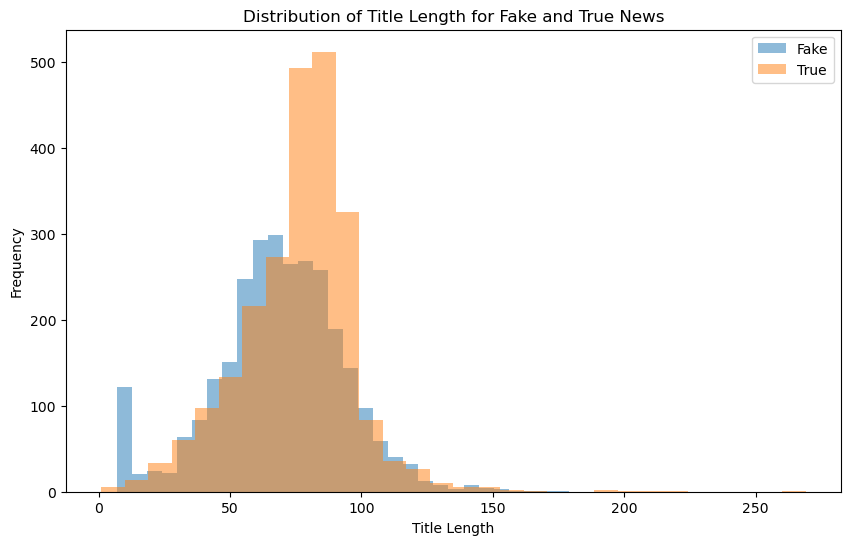

In [42]:
test_df['title_length'] = test_df['title'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(test_df[test_df['label'] == 1]['title_length'], alpha=0.5, label='Fake', bins=30)
plt.hist(test_df[test_df['label'] == 0]['title_length'], alpha=0.5, label='True', bins=30)
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.title('Distribution of Title Length for Fake and True News')
plt.legend()
plt.show()

## df_combined Distribution of Fake and True News According to Text Length

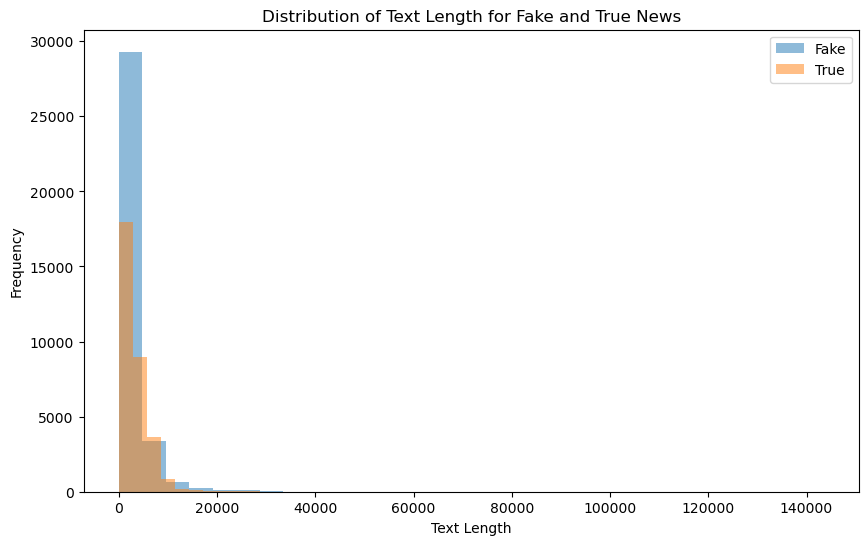

In [43]:
df_combined['text_length'] = df_combined['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df_combined[df_combined['target'] == 1]['text_length'], alpha=0.5, label='Fake', bins=30)
plt.hist(df_combined[df_combined['target'] == 0]['text_length'], alpha=0.5, label='True', bins=30)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Fake and True News')
plt.legend()
plt.show()


# Analisis de Palabras más Frecuentes

## df_combined

Nube de palabras para los textos de los articulos:


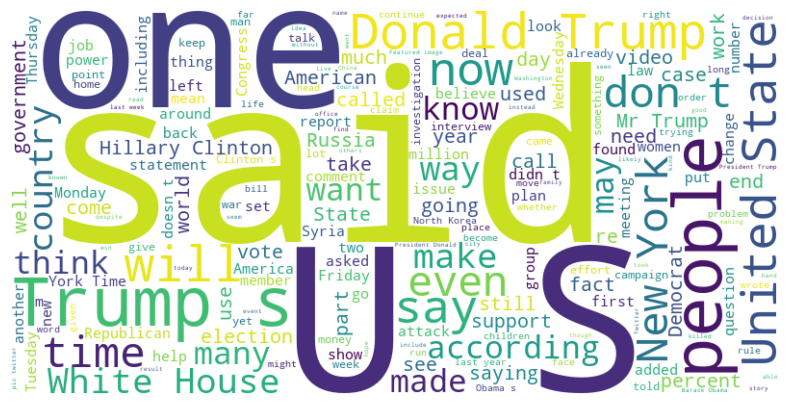

In [44]:
from collections import Counter
from wordcloud import WordCloud

def generate_cloud(texto):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

texts = ' '.join(df_combined['text'].astype(str))

print("Nube de palabras para los textos de los articulos:")
generate_cloud(texts)


## test_df

Nube de palabras para los titulos:


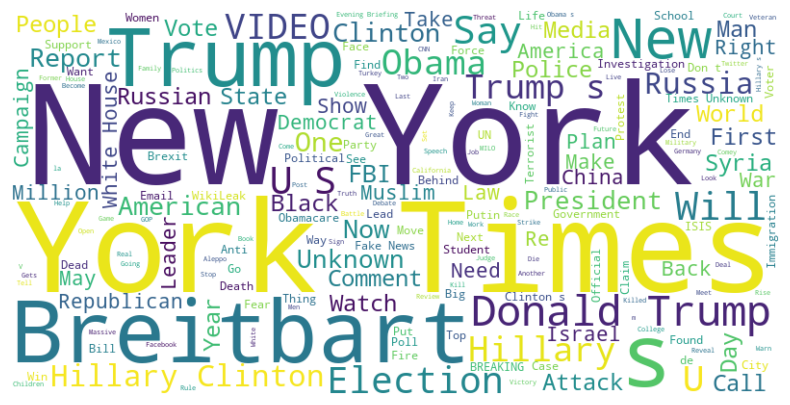

Nube de palabras para los textos de los articulos:


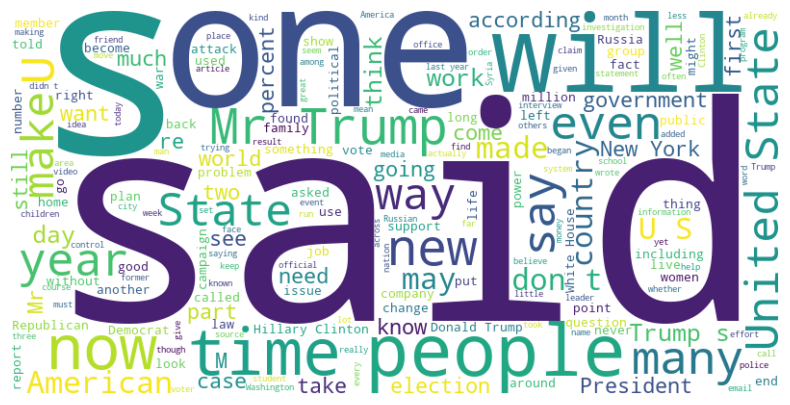

In [45]:
from collections import Counter
from wordcloud import WordCloud

def generate_cloud(texto):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

titles = ' '.join(test_df['title'].astype(str))

print("Nube de palabras para los titulos:")
generate_cloud(titles)

texts = ' '.join(test_df['text'].astype(str))

print("Nube de palabras para los textos de los articulos:")
generate_cloud(texts)


## Analisis de N-Gramas

### df_combined

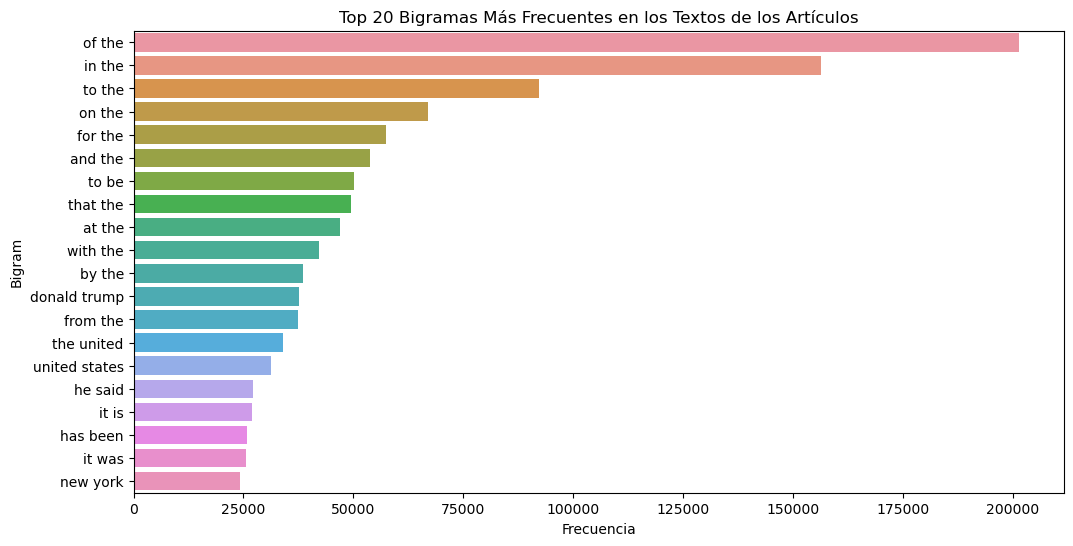

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    palabras_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    palabras_freq = sorted(palabras_freq, key=lambda x: x[1], reverse=True)
    return palabras_freq[:n]

bigrams = get_ngrams(df_combined['text'], n=20, ngram_range=(2, 2))

bigram_df = pd.DataFrame(bigrams, columns=['Bigram', 'Frecuencia'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y='Bigram', data=bigram_df)
plt.title('Top 20 Bigramas Más Frecuentes en los Textos de los Artículos')
plt.show()


### test_df

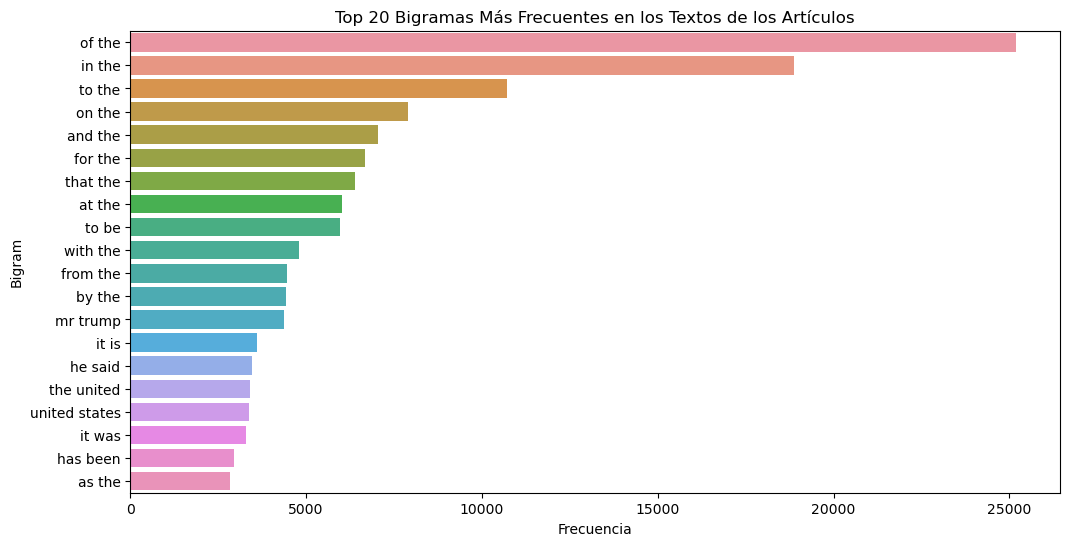

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    palabras_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    palabras_freq = sorted(palabras_freq, key=lambda x: x[1], reverse=True)
    return palabras_freq[:n]

bigrams = get_ngrams(test_df['text'], n=20, ngram_range=(2, 2))

bigram_df = pd.DataFrame(bigrams, columns=['Bigram', 'Frecuencia'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y='Bigram', data=bigram_df)
plt.title('Top 20 Bigramas Más Frecuentes en los Textos de los Artículos')
plt.show()


# Extract features using the trained PCA

In [48]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df_combined[['text']]
y = df_combined['target']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar TF-IDF a los datos de texto
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['text'])

# Realizar PCA en los datos de TF-IDF
pca = PCA(n_components=0.8)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

# Guardar el objeto PCA entrenado
filename = "pca_model.pkl"
joblib.dump(pca, filename)
print(f"Objeto PCA guardado como {filename}")

# Guardar el objeto TfidfVectorizer entrenado
filename = "tfidf_vectorizer.pkl"
joblib.dump(tfidf_vectorizer, filename)
print(f"Objeto TfidfVectorizer guardado como {filename}")

Objeto PCA guardado como pca_model.pkl
Objeto TfidfVectorizer guardado como tfidf_vectorizer.pkl


# Model Training

In [49]:
import os
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Silenciar la advertencia sobre el conteo de núcleos físicos y lógicos
os.environ['LOKY_MAX_CPU_COUNT'] = '4' 

# Definir los modelos y los hiperparámetros a ajustar
models = {
    'Logistic_Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'model__C': [0.1, 1, 10]}
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {'model__n_neighbors': [3, 5, 7]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'model__max_depth': [None, 10, 20]}
    }
    
}

trained_models = {}

for model_name, model_data in models.items():
    print(f"Evaluating {model_name}...")
    pipeline = Pipeline([
        ('model', model_data['model'])
    ])
    grid_search = GridSearchCV(pipeline, model_data['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_pca, y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")
    
    # Evaluación del modelo en el conjunto de prueba
    y_pred = grid_search.predict(X_test_pca)
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"Precision for {model_name}: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall for {model_name}: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-score for {model_name}: {f1_score(y_test, y_pred, average='weighted')}")
    print("")
    print("")

    # Guardar el modelo entrenado
    trained_models[model_name] = grid_search

# Guardar los modelos entrenados en archivos
for model_name, model in trained_models.items():
    filename = f"{model_name}_model.pkl"
    joblib.dump(model, filename)
    print(f"Modelo {model_name} guardado como {filename}")


Evaluating Logistic_Regression...
Best parameters for Logistic_Regression: {'model__C': 10}
Best cross-validation accuracy for Logistic_Regression: 0.9668551458050352
Accuracy for Logistic_Regression: 0.969768504416692
Precision for Logistic_Regression: 0.9697682104302475
Recall for Logistic_Regression: 0.969768504416692
F1-score for Logistic_Regression: 0.9697676762617535


Evaluating K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'model__n_neighbors': 7}
Best cross-validation accuracy for K-Nearest Neighbors: 0.8362557476052531
Accuracy for K-Nearest Neighbors: 0.8409990862016449
Precision for K-Nearest Neighbors: 0.8445312532755155
Recall for K-Nearest Neighbors: 0.8409990862016449
F1-score for K-Nearest Neighbors: 0.8408835857443933


Evaluating Decision Tree...
Best parameters for Decision Tree: {'model__max_depth': 10}
Best cross-validation accuracy for Decision Tree: 0.8577492954548399
Accuracy for Decision Tree: 0.8630063965884861
Precision for Decision Tree: 

For the K-Nearest Neighbors model..

On the other hand, the Logistic Regression model achieved much better performance. The best parameters found were a C value of 10. The cross-validation accuracy and evaluation metrics are all high, around 96%. This indicates that the Logistic Regression model fits the data well and can accurately predict whether a news article is fake or true.